In [7]:
import torch
from torch import  nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [8]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [9]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

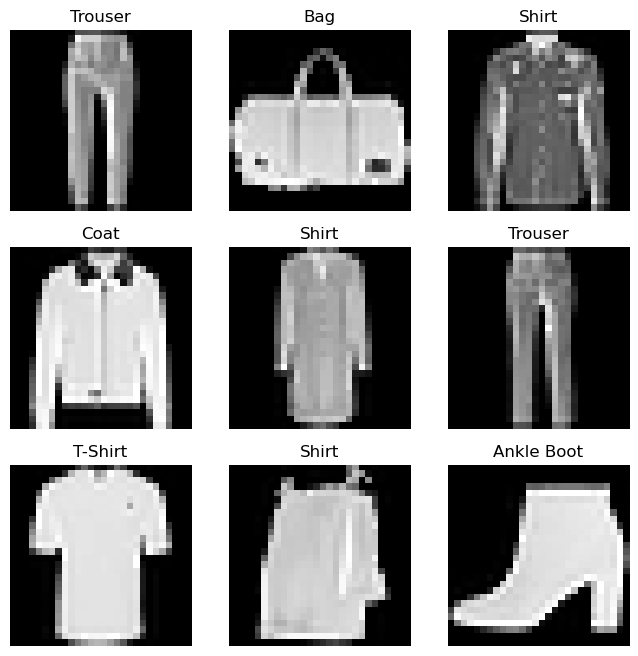

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()


In [12]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [13]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - import for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practice
    model.train()
    
    for batch , (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluate mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {100 * correct:>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}/{epochs}\n ----------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done")

Epoch 1/10
 ----------------------------------
loss: 2.307343  [   64/60000]
loss: 2.295374  [ 6464/60000]
loss: 2.286761  [12864/60000]
loss: 2.284757  [19264/60000]
loss: 2.248178  [25664/60000]
loss: 2.237024  [32064/60000]
loss: 2.236928  [38464/60000]
loss: 2.212807  [44864/60000]
loss: 2.210124  [51264/60000]
loss: 2.180459  [57664/60000]
Test Error: 
 Accuracy: 40.6%, Avg loss: 2.178317 

Epoch 2/10
 ----------------------------------
loss: 2.181449  [   64/60000]
loss: 2.177498  [ 6464/60000]
loss: 2.131716  [12864/60000]
loss: 2.149993  [19264/60000]
loss: 2.090305  [25664/60000]
loss: 2.049803  [32064/60000]
loss: 2.064086  [38464/60000]
loss: 2.004248  [44864/60000]
loss: 2.005823  [51264/60000]
loss: 1.937514  [57664/60000]
Test Error: 
 Accuracy: 52.8%, Avg loss: 1.937924 

Epoch 3/10
 ----------------------------------
loss: 1.960558  [   64/60000]
loss: 1.941922  [ 6464/60000]
loss: 1.836110  [12864/60000]
loss: 1.873570  [19264/60000]
loss: 1.759181  [25664/60000]
loss:

Let's test now if i could use this model to predict something

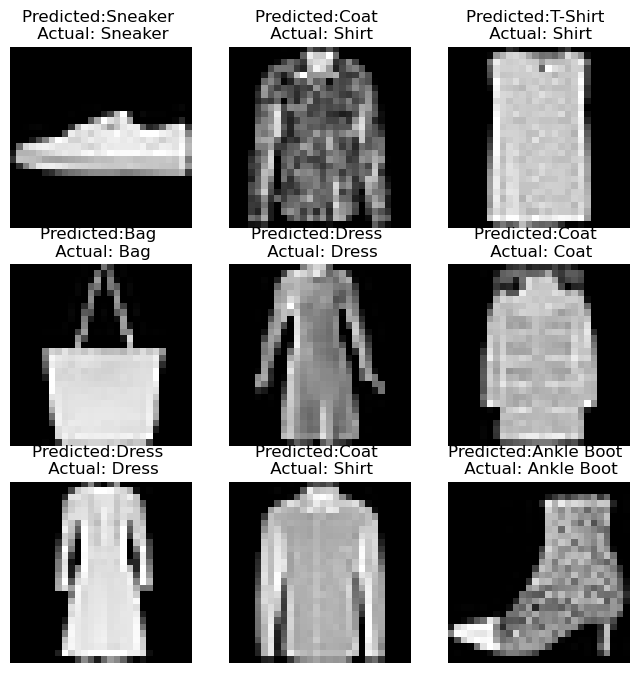

In [30]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    pred = model(img)
    index = torch.argmax(pred, dim=1).numpy()[0]
    
    title = f"Predicted:{labels_map[index]} \n Actual: {labels_map[label]}"
    plt.title(title)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Results are not so good as I expected, but they are results. 
First ever trained model 